# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

In [ ]:
df = pd.read_csv("wifi_localization.txt", sep = '\t', header = None)
df.columns = ["wifi1", "wifi2", "wifi3", "wifi4", "wifi5", "wifi6", "wifi7", "room"]
df.head()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [ ]:
df.tail()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4
1999,-59,-50,-45,-60,-45,-88,-87,4


In [ ]:
df.shape

(2000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   wifi1   2000 non-null   int64
 1   wifi2   2000 non-null   int64
 2   wifi3   2000 non-null   int64
 3   wifi4   2000 non-null   int64
 4   wifi5   2000 non-null   int64
 5   wifi6   2000 non-null   int64
 6   wifi7   2000 non-null   int64
 7   room    2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
df["room"].value_counts() #balanced data

1    500
2    500
3    500
4    500
Name: room, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wifi1,2000.0,-52.3305,11.321677,-74.0,-61.00,-55.0,-46.00,-10.0
wifi2,2000.0,-55.6235,3.417688,-74.0,-58.00,-56.0,-53.00,-45.0
wifi3,2000.0,-54.9640,5.316186,-73.0,-58.00,-55.0,-51.00,-40.0
wifi4,2000.0,-53.5665,11.471982,-77.0,-63.00,-56.0,-46.00,-11.0
wifi5,2000.0,-62.6405,9.105093,-89.0,-69.00,-64.0,-56.00,-36.0
wifi6,2000.0,-80.9850,6.516672,-97.0,-86.00,-82.0,-77.00,-61.0
wifi7,2000.0,-81.7265,6.519812,-98.0,-87.00,-83.0,-78.00,-63.0
room,2000.0,2.5000,1.118314,1.0,1.75,2.5,3.25,4.0


<Axes: >

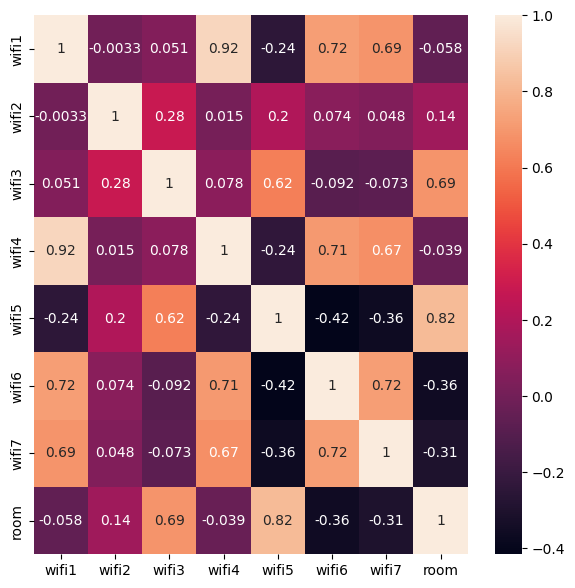

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True) # In regression problems correlation is important.

<Axes: xlabel='wifi3', ylabel='Count'>

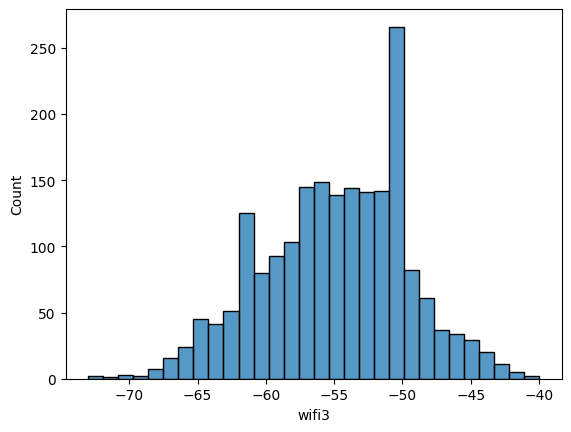

In [ ]:
sns.histplot(df["wifi3"]) # not useful results

<Axes: xlabel='wifi3', ylabel='wifi5'>

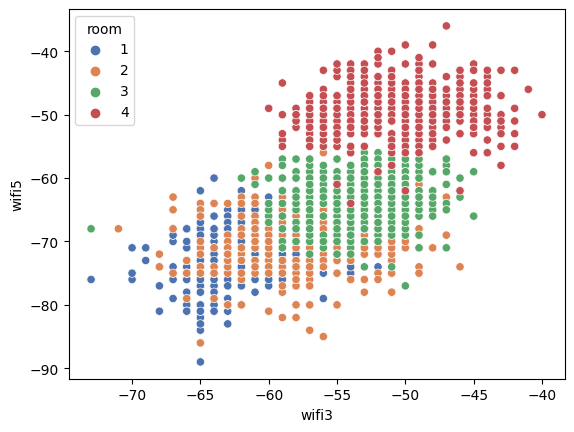

In [ ]:
sns.scatterplot(data= df, x="wifi3", y="wifi5", hue="room", palette="deep") # hue is the target future

<Axes: xlabel='wifi5', ylabel='wifi7'>

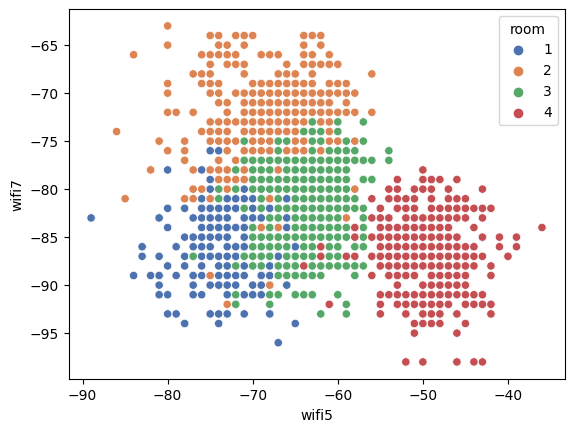

In [ ]:
sns.scatterplot(data= df, x="wifi5", y="wifi7", hue="room", palette="deep")

## Boyut İndirgeme Teknikleri(PCA-LDA-tSNE)

**PCA**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2,random_state=53) # n_components = how many dimensions

In [ ]:
X = df.drop("room", axis=1) #features
y = df["room"] #target

In [ ]:
X

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7
0,-64,-56,-61,-66,-71,-82,-81
1,-68,-57,-61,-65,-71,-85,-85
2,-63,-60,-60,-67,-76,-85,-84
3,-61,-60,-68,-62,-77,-90,-80
4,-63,-65,-60,-63,-77,-81,-87
...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94
1996,-59,-56,-50,-62,-47,-87,-90
1997,-62,-59,-46,-65,-45,-87,-88
1998,-62,-58,-52,-61,-41,-90,-85


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1995    4
1996    4
1997    4
1998    4
1999    4
Name: room, Length: 2000, dtype: int64

In [ ]:
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_result, columns= ["Component 1", "Component 2"])
pca_df["room"] = y
pca_df

,Component 1,Component 2,room
0,-13.420580,14.121511,1
1,-17.354605,14.091161,1
2,-14.205887,17.789814,1
3,-9.886346,20.566852,1
4,-11.146006,18.489701,1
...,...,...,...
1995,-19.683483,-11.314212,4
1996,-16.896809,-13.850302,4
1997,-20.510498,-15.751400,4
1998,-18.781045,-17.510348,4


<Axes: xlabel='Component 1', ylabel='Component 2'>

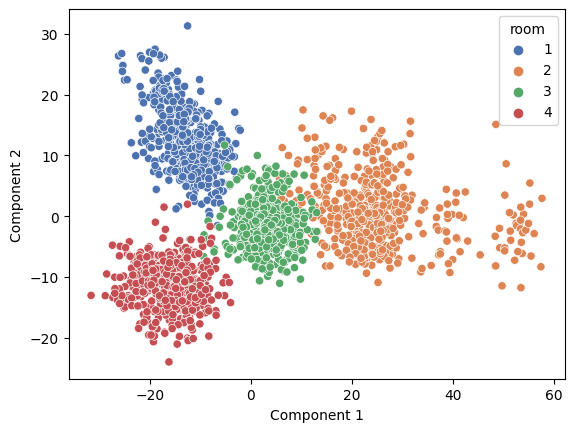

In [ ]:
sns.scatterplot(data = pca_df, x = "Component 1", y= "Component 2", palette="deep", hue="room")

# Model Time

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state=53, shuffle=True)
# shuffle = default value is True. If your data doesn't have to be sequential, it can be True.
# stratify = equal ratio. It is necessary in imbalanced data.

#### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(X_test)
y_pred

array([3, 3, 3, 4, 2, 1, 1, 3, 3, 1, 2, 2, 2, 2, 2, 3, 1, 4, 2, 2, 2, 3,
       1, 4, 2, 1, 2, 1, 2, 4, 3, 4, 2, 2, 3, 2, 3, 4, 1, 2, 2, 2, 3, 4,
       4, 4, 2, 1, 3, 2, 1, 3, 1, 2, 2, 1, 4, 4, 4, 1, 1, 1, 3, 4, 4, 4,
       1, 2, 3, 1, 1, 4, 1, 1, 4, 1, 4, 2, 4, 1, 4, 1, 3, 3, 2, 1, 3, 2,
       2, 2, 2, 4, 4, 1, 3, 4, 4, 1, 3, 4, 1, 4, 4, 4, 3, 2, 2, 3, 2, 3,
       3, 4, 2, 1, 3, 3, 1, 3, 4, 3, 4, 2, 2, 4, 1, 1, 4, 2, 1, 1, 3, 4,
       4, 3, 1, 1, 4, 3, 2, 1, 4, 3, 3, 3, 4, 1, 1, 3, 1, 3, 4, 3, 3, 2,
       3, 2, 3, 3, 1, 1, 1, 3, 4, 1, 2, 4, 4, 2, 3, 3, 2, 3, 3, 2, 2, 3,
       2, 2, 3, 3, 3, 4, 1, 4, 4, 3, 2, 4, 1, 1, 2, 1, 4, 4, 4, 3, 1, 1,
       4, 3, 1, 3, 1, 4, 3, 1, 3, 2, 2, 3, 3, 4, 2, 3, 2, 4, 4, 1, 2, 1,
       1, 3, 3, 2, 2, 2, 3, 1, 4, 1, 4, 3, 1, 3, 4, 4, 2, 4, 4, 2, 2, 2,
       4, 4, 4, 3, 1, 1, 1, 2, 1, 2, 2, 4, 1, 4, 1, 1, 3, 2, 1, 2, 1, 1,
       1, 3, 3, 2, 3, 3, 1, 2, 4, 3, 3, 4, 4, 1, 1, 1, 1, 3, 2, 2, 1, 3,
       4, 4, 2, 2, 3, 4, 2, 3, 1, 4, 1, 2, 4, 3, 1,

In [ ]:
np.array(y_test)

array([3, 3, 3, 4, 2, 1, 1, 3, 3, 1, 2, 2, 2, 2, 2, 3, 1, 4, 2, 2, 2, 3,
       1, 4, 2, 1, 2, 1, 2, 4, 3, 4, 2, 2, 3, 2, 3, 4, 1, 2, 2, 2, 3, 4,
       4, 4, 2, 1, 3, 2, 1, 3, 1, 2, 2, 1, 4, 4, 4, 1, 1, 1, 3, 4, 4, 4,
       1, 2, 3, 1, 1, 4, 1, 1, 4, 1, 4, 2, 4, 1, 4, 1, 3, 3, 2, 1, 3, 2,
       2, 2, 2, 4, 4, 1, 3, 4, 4, 1, 3, 4, 1, 4, 4, 4, 3, 2, 2, 3, 2, 3,
       2, 4, 2, 1, 3, 3, 1, 3, 4, 3, 4, 2, 2, 4, 1, 1, 4, 2, 1, 1, 3, 4,
       4, 3, 1, 1, 4, 3, 2, 1, 4, 2, 3, 3, 4, 1, 1, 3, 1, 3, 4, 3, 3, 2,
       2, 2, 3, 3, 4, 1, 1, 3, 4, 1, 2, 4, 4, 2, 3, 3, 2, 2, 3, 2, 2, 3,
       2, 2, 3, 3, 2, 4, 1, 4, 4, 3, 2, 4, 1, 1, 2, 1, 4, 4, 4, 3, 1, 1,
       4, 3, 1, 3, 1, 4, 3, 1, 3, 2, 3, 3, 3, 4, 2, 3, 2, 4, 4, 1, 2, 1,
       1, 3, 3, 2, 2, 2, 3, 1, 4, 1, 4, 3, 1, 3, 4, 4, 2, 4, 4, 2, 2, 2,
       4, 4, 4, 3, 1, 1, 1, 2, 1, 2, 2, 4, 1, 4, 1, 1, 3, 2, 1, 2, 1, 1,
       1, 3, 3, 2, 3, 3, 1, 2, 4, 3, 3, 4, 4, 1, 1, 1, 1, 3, 2, 2, 1, 3,
       4, 4, 2, 2, 3, 4, 2, 3, 1, 4, 1, 2, 4, 3, 1,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #evaluation metrics

In [ ]:
accuracy_score(y_test, y_pred)

0.98

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       100
           2       0.99      0.94      0.96       100
           3       0.94      0.99      0.97       100
           4       1.00      0.99      0.99       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [ ]:
confusion_matrix(y_test, y_pred)

array([[100,   0,   0,   0],
       [  0,  94,   6,   0],
       [  0,   1,  99,   0],
       [  1,   0,   0,  99]])

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_model, X, y, cv=5).mean() # cv paramater asks how many pieces we want

0.9795

### SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC(kernel = "rbf", C = 10)

svc_model.fit(X_train, y_train)

SVC(C=10)

In [ ]:
svc_y_pred = svc_model.predict(X_test)

In [ ]:
accuracy_score(y_test, svc_y_pred)

0.9775

In [ ]:
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       100
           2       0.99      0.93      0.96       100
           3       0.93      0.99      0.96       100
           4       1.00      0.99      0.99       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [ ]:
confusion_matrix(y_test, y_pred)

array([[100,   0,   0,   0],
       [  0,  93,   7,   0],
       [  0,   1,  99,   0],
       [  1,   0,   0,  99]])

In [ ]:
cross_val_score(svc_model, X, y, cv=5).mean()

0.9775